In [15]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
plt.style.use("ggplot")
import datetime as dt

%matplotlib inline

In [3]:
os.getcwd()

'/Users/Daniel1020/Documents/Business Analytics/Python/Project'

In [7]:
os.chdir('/Users/Daniel1020/Downloads')

In [12]:
data = pd.read_csv('referral.csv',parse_dates=['date'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97341 entries, 0 to 97340
Data columns (total 6 columns):
user_id        97341 non-null int64
date           97341 non-null datetime64[ns]
country        97341 non-null object
money_spent    97341 non-null int64
is_referral    97341 non-null int64
device_id      97341 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 4.5+ MB


In [14]:
data.head()

,user_id,date,country,money_spent,is_referral,device_id
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH


# Data Processing

In [20]:
referral_starts=dt.datetime(2015,10,31)

In [17]:
data.date.describe()

count                   97341
unique                     56
top       2015-11-14 00:00:00
freq                     3303
first     2015-10-03 00:00:00
last      2015-11-27 00:00:00
Name: date, dtype: object

In [21]:
(pd.Series(data.date.unique())>=referral_starts).value_counts()

True     28
False    28
dtype: int64

#### we realize that actully some dates are before the started dates, and some are behind the date

In [22]:
data['dateofweek']=data['date'].apply(lambda x: x.dayofweek)

# Data Visualization

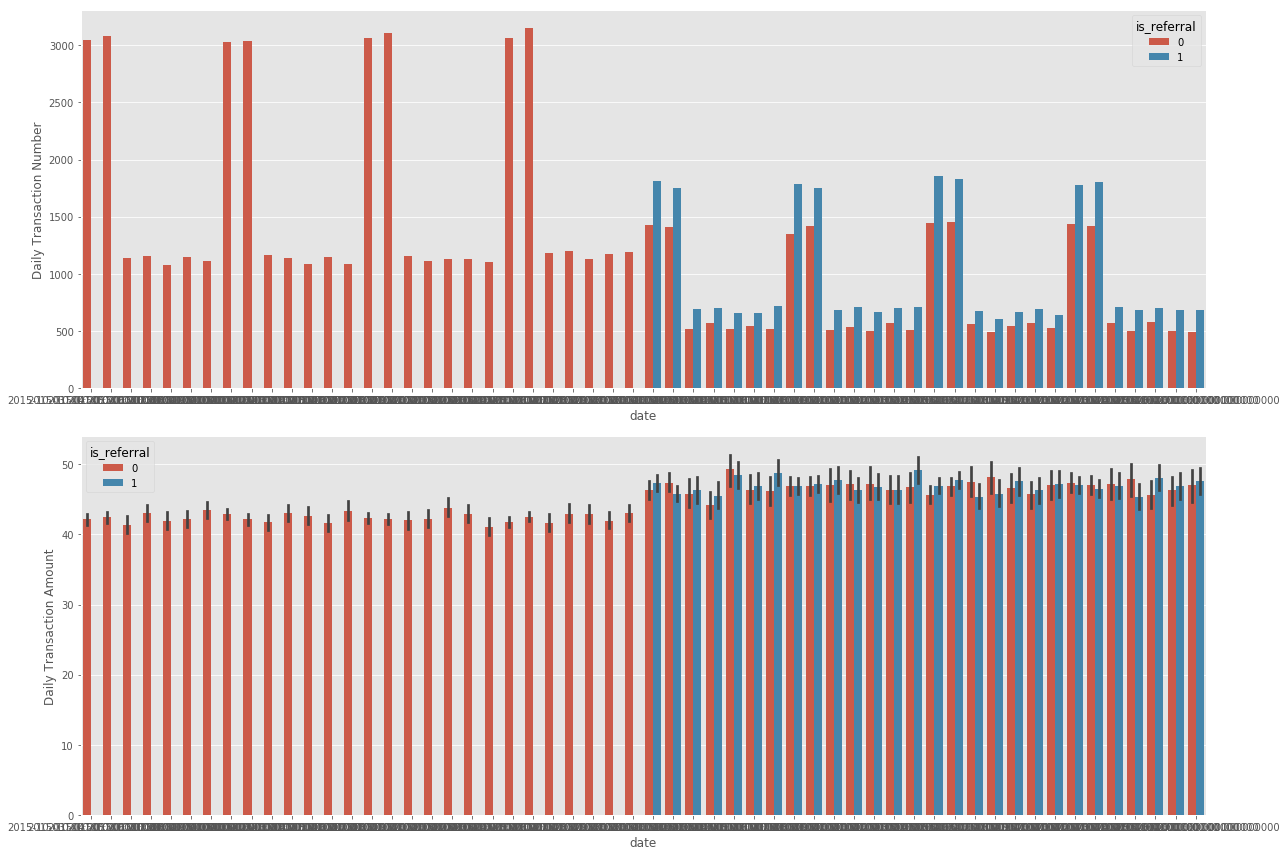

In [26]:
#Daily money spend visulization
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(18,12))
sns.countplot(x='date',hue='is_referral',data=data,ax=ax[0])
ax[0].set_ylabel('Daily Transaction Number',fontsize=12)

sns.barplot(x='date',y='money_spent',hue='is_referral',data=data,ax=ax[1])
ax[1].set_ylabel('Daily Transaction Amount',fontsize=12)
plt.tight_layout()
plt.show()

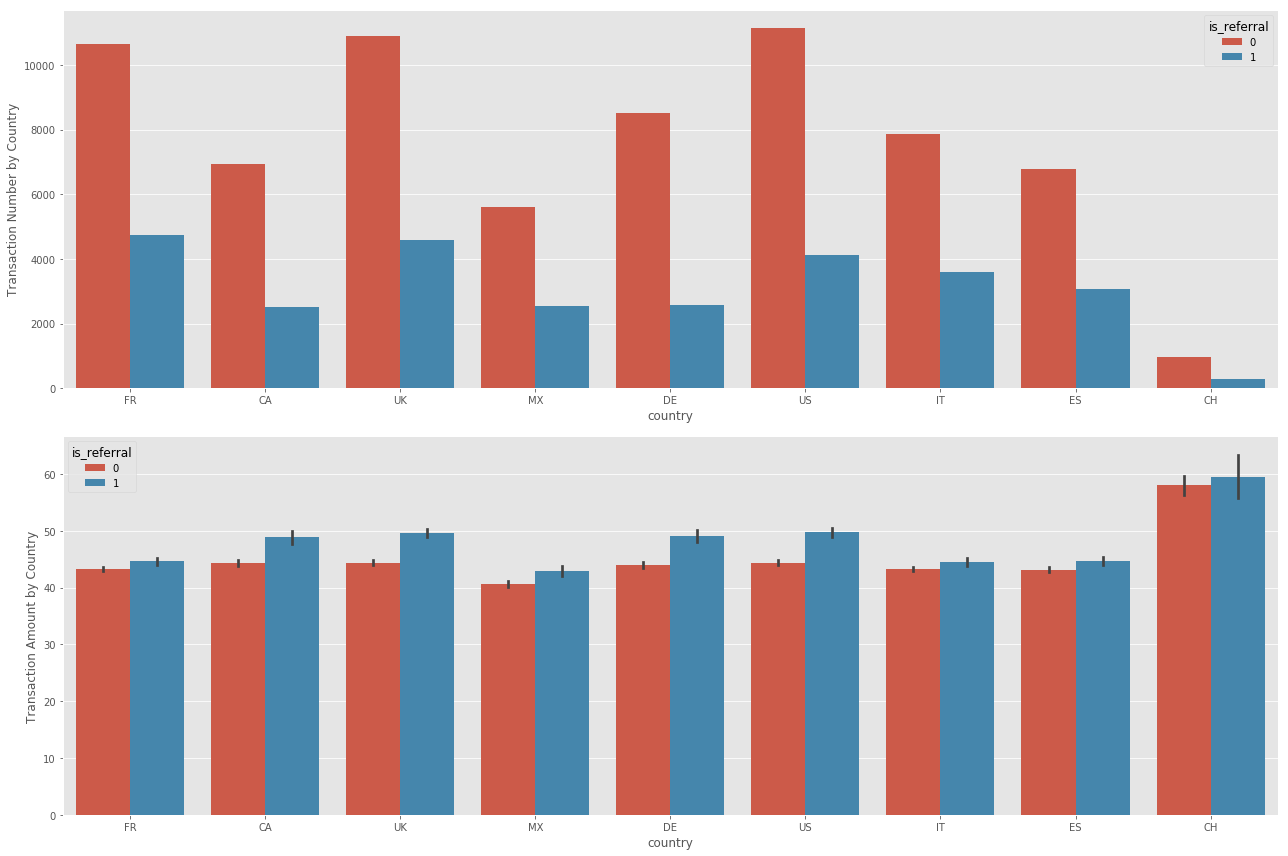

In [28]:
# Spent by Country visualization
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(18,12))
sns.countplot(x='country',hue='is_referral',data=data,ax=ax[0])
ax[0].set_ylabel('Transaction Number by Country',fontsize=12)

sns.barplot(x='country',y='money_spent',hue='is_referral',data=data,ax=ax[1])
ax[1].set_ylabel('Transaction Amount by Country',fontsize=12)
plt.tight_layout()
plt.show()

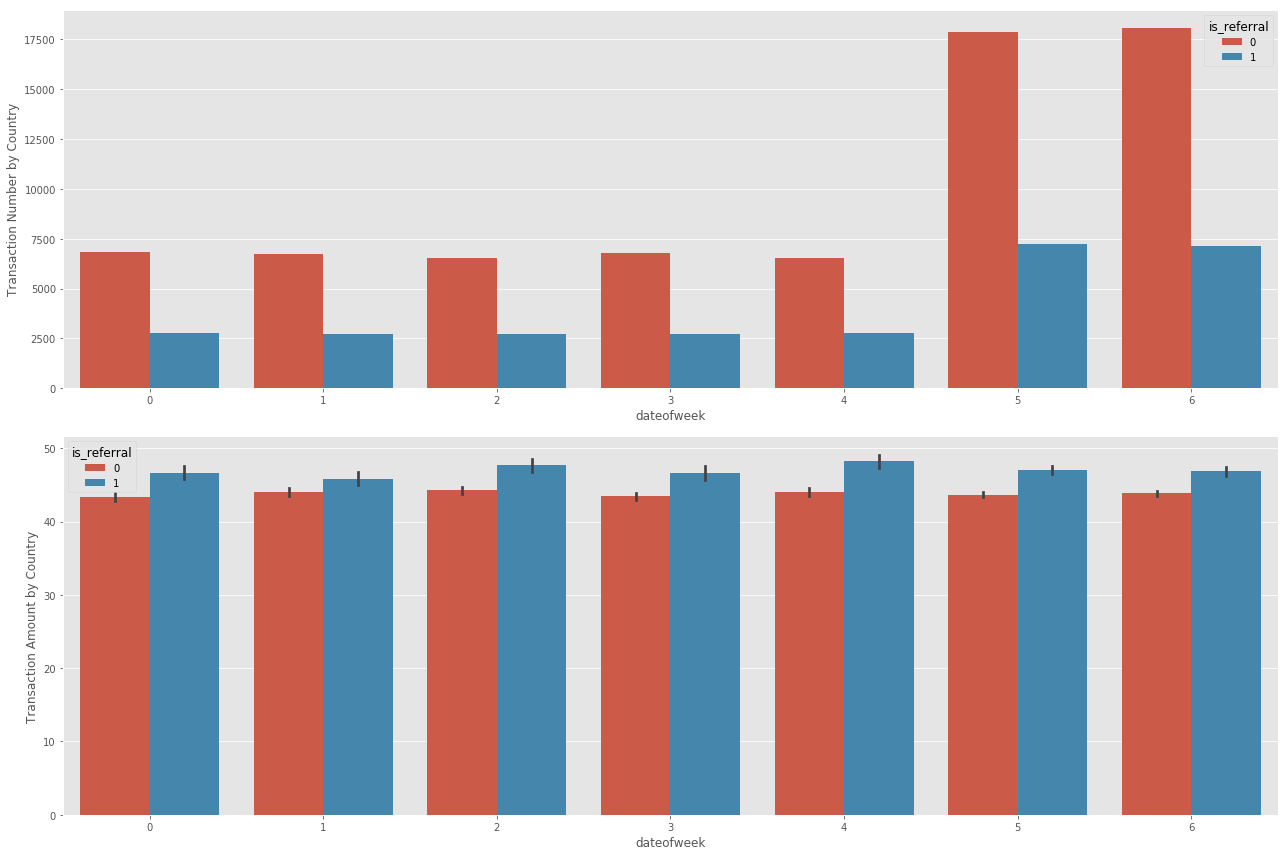

In [31]:
# Spent by dayofweek visualization
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(18,12))
sns.countplot(x='dateofweek',hue='is_referral',data=data,ax=ax[0])
ax[0].set_ylabel('Transaction Number by Country',fontsize=12)

sns.barplot(x='dateofweek',y='money_spent',hue='is_referral',data=data,ax=ax[1])
ax[1].set_ylabel('Transaction Amount by Country',fontsize=12)
plt.tight_layout()
plt.show()

# Data Analysis

## Daily Analysis

In [34]:
def basic_stat(df):
    no_purchase = len(df)
    money_spent = df['money_spent'].sum()
    unique_user = len(df['user_id'].unique())
    
    return pd.Series([no_purchase,money_spent,unique_user],
                    index = ['no_purchase','money_spent','unique_user'])

In [55]:
def daily_stat(df):
    grouped = df.groupby('date').apply(basic_stat)
    
    ref = grouped.loc[grouped.index < referral_starts,:]
    new = grouped.loc[grouped.index>=referral_starts,:]
    
    
    names = ['no_purchase','money_spent','unique_user']
    vals = []
    
    for name in names :
        pre_data = ref[name].values
        pre_mean = pre_data.mean()
        
        post_data = new[name].values
        post_mean = post_data.mean()
        
        p_value= ttest_ind(pre_data,post_data,equal_var=False)[1]/2
        
        vals.append({'pre_mean':pre_mean,'post_mean':post_mean,'mean_diff':post_mean - pre_mean,
                    'pvalue':p_value})
        
    return pd.DataFrame(vals,index=names).loc[:,['pre_mean','post_mean','mean_diff','pvalue']]

In [56]:
daily_stat(data)

,pre_mean,post_mean,mean_diff,pvalue
no_purchase,1690.750000,1785.714286,94.964286,0.348257
money_spent,71657.000000,83714.392857,12057.392857,0.135194
unique_user,1384.464286,1686.964286,302.500000,0.059545


## By-Country Analysis

In [59]:
data.groupby('country').apply(daily_stat)

pre_mean     post_mean    mean_diff    pvalue
country                                                               
CA      no_purchase    177.142857    160.000000   -17.142857  0.233985
        money_spent   7468.428571   7880.428571   412.000000  0.351704
        unique_user    173.285714    159.178571   -14.107143  0.268256
CH      no_purchase     26.821429     17.071429    -9.750000  0.003072
        money_spent   1536.321429   1023.892857  -512.428571  0.006941
        unique_user     26.714286     17.071429    -9.642857  0.003142
DE      no_purchase    232.142857    164.035714   -68.107143  0.011798
        money_spent   9856.750000   8013.964286 -1842.785714  0.081459
        unique_user    224.964286    163.250000   -61.714286  0.015665
ES      no_purchase    156.607143    194.500000    37.892857  0.072638
        money_spent   6648.642857   8660.571429  2011.928571  0.037522
        unique_user    153.392857    193.214286    39.821429  0.057954
FR      no_purchase    244.142857    305.714286    61.571429  0.058996
        money_spent  10385.250000  13635.000000  3249.750000  0.031843
        unique_user    236.500000    302.535714    66.035714  0.041124
IT      no_purchase    180.857143    227.928571    47.071429  0.057454
        money_spent   7651.571429  10193.428571  2541.857143  0.025730
        unique_user    176.535714    226.107143    49.571429  0.043911
MX      no_purchase    126.464286    164.000000    37.535714  0.032430
        money_spent   4975.464286   7033.214286  2057.750000  0.009670
        unique_user    124.392857    163.107143    38.714286  0.026203
UK      no_purchase    264.285714    289.035714    24.750000  0.261183
        money_spent  11213.535714  14196.428571  2982.892857  0.048490
        unique_user    255.571429    286.321429    30.750000  0.204398
US      no_purchase    282.285714    263.428571   -18.857143  0.307801
        money_spent  11921.035714  13077.464286  1156.428571  0.248874
        unique_user    273.178571    261.107143   -12.071429  0.368860

###  from the stats above, we can see that:
the program fails in the stats of CH and DE, it significantly caused the sales down
while it succeeded in the states of MX IT FR ES since it led their sales increased

There is no effect in the rest states 

## Day-of-Week Analysis

In [61]:
data.groupby('dateofweek').apply(daily_stat)

pre_mean  post_mean  mean_diff    pvalue
dateofweek                                                       
0          no_purchase    1159.75    1233.50      73.75  0.012484
           money_spent   48356.50   57677.00    9320.50  0.000368
           unique_user    1036.75    1190.25     153.50  0.000665
1          no_purchase    1152.75    1200.50      47.75  0.156965
           money_spent   49333.00   55473.25    6140.25  0.007701
           unique_user    1026.50    1168.00     141.50  0.008802
2          no_purchase    1104.00    1209.50     105.50  0.009713
           money_spent   47302.00   57406.75   10104.75  0.000301
           unique_user     987.50    1174.75     187.25  0.001270
3          no_purchase    1148.75    1229.00      80.25  0.016584
           money_spent   48445.00   57043.25    8598.25  0.000675
           unique_user    1036.25    1190.25     154.00  0.002578
4          no_purchase    1123.50    1200.50      77.00  0.016875
           money_spent   48019.75   57138.50    9118.75  0.000595
           unique_user    1014.25    1167.75     153.50  0.000683
5          no_purchase    3052.00    3219.75     167.75  0.006828
           money_spent  129109.25  150779.25   21670.00  0.000107
           unique_user    2280.50    2967.75     687.25  0.000125
6          no_purchase    3094.50    3207.25     112.75  0.011717
           money_spent  131033.50  150482.75   19449.25  0.000133
           unique_user    2309.50    2950.00     640.50  0.000012